# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [1]:
import numpy as np
import matplotlib as plt

# create training dataset
train_points = 2000
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 500

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

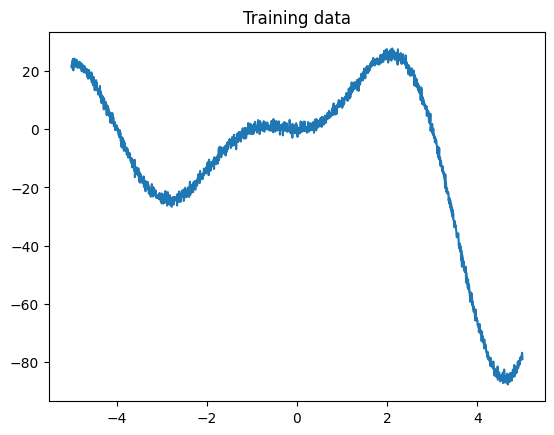

In [2]:
from matplotlib import pyplot as plt

plt.plot(X_train, y_train)
plt.title("Training data")
plt.show()

In [3]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    report = "Mean Absolute Error (MAE) : " + str(mean_absolute_error(y_true, y_pred)) + "\n" + "Mean Squared Error (MSE) : " + str(root_mean_squared_error(y_true, y_pred)**2) + "\n" +"Root Mean Squared Error (RMSE) : " + str(root_mean_squared_error(y_true, y_pred)) + "\n" +"R² Score : " + str(r2_score(y_true, y_pred))
    return report

def truth_vs_prediction_plot(X, y, model):
    plt.scatter(X, y, c="blue", label = "Ground Truth")
    plt.scatter(X, model.predict(X), c = "red", label = "Prediction")
    plt.legend()
    plt.title("Truth vs Prediction")
    plt.show()

Mean Absolute Error (MAE) : 21.858028556923582
Mean Squared Error (MSE) : 716.165280641242
Root Mean Squared Error (RMSE) : 26.761264556093796
R² Score : 0.18479149638976589


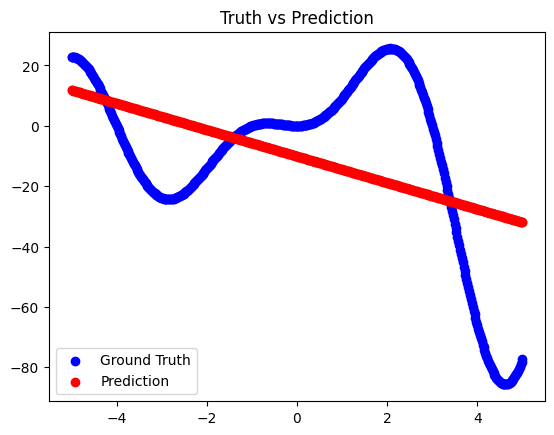

In [4]:
from sklearn.linear_model import Ridge

ridge_clf = Ridge(alpha=1)
ridge_clf.fit(X_train, y_train)
print(regression_report(y_test, ridge_clf.predict(X_test)))
truth_vs_prediction_plot(X_test, y_test, ridge_clf)

Mean Absolute Error (MAE) : 0.12089070353545542
Mean Squared Error (MSE) : 0.04418603039926024
Root Mean Squared Error (RMSE) : 0.210204734483456
R² Score : 0.9999497031918526


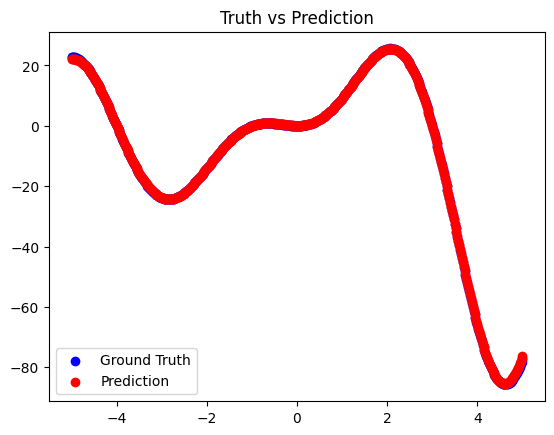

In [5]:
from sklearn.kernel_ridge import KernelRidge

kernel_rbf_ridge_clf = KernelRidge(alpha=1, kernel="rbf", gamma=1)
kernel_rbf_ridge_clf.fit(X_train, y_train)
print(regression_report(y_test, kernel_rbf_ridge_clf.predict(X_test)))
truth_vs_prediction_plot(X_test, y_test, kernel_rbf_ridge_clf)

Mean Absolute Error (MAE) : 7.190448641041467
Mean Squared Error (MSE) : 84.5635326203638
Root Mean Squared Error (RMSE) : 9.195843225086202
R² Score : 0.9037416183793257


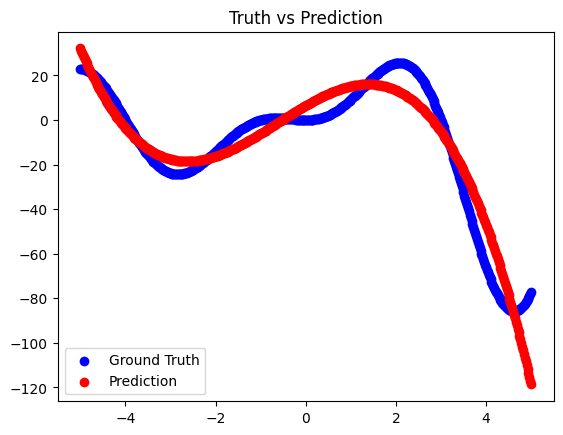

In [6]:
kernel_poly_ridge_clf = KernelRidge(alpha=1, kernel="poly", gamma=3)
kernel_poly_ridge_clf.fit(X_train, y_train)
print(regression_report(y_test, kernel_poly_ridge_clf.predict(X_test)))
truth_vs_prediction_plot(X_test, y_test, kernel_poly_ridge_clf)

Best Parameters: {'gamma': 1}
Mean Absolute Error (MAE) : 0.12089070353545542
Mean Squared Error (MSE) : 0.04418603039926024
Root Mean Squared Error (RMSE) : 0.210204734483456
R² Score : 0.9999497031918526


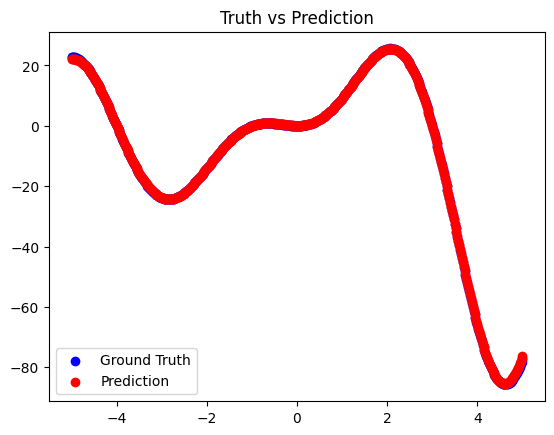

In [7]:
from sklearn.model_selection import GridSearchCV

model = KernelRidge(kernel="rbf")
param_grid = {
    "gamma" : [0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]
}
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring="r2")
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print(regression_report(y_test, best_model.predict(X_test)))
truth_vs_prediction_plot(X_test, y_test, best_model)

Best Parameters: {'alpha': 100, 'gamma': 10}
Mean Absolute Error (MAE) : 7.197532954235018
Mean Squared Error (MSE) : 84.73666884885694
Root Mean Squared Error (RMSE) : 9.20525224254376
R² Score : 0.9035445379991874


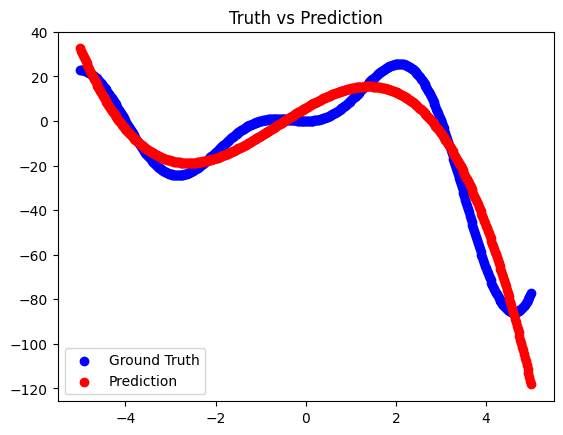

In [8]:
model = KernelRidge(kernel="poly")
param_grid = {
    "alpha" : [0.001, 0.01, 0.1, 1, 10, 100], 
    "gamma" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring="r2")
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print(regression_report(y_test, best_model.predict(X_test)))
truth_vs_prediction_plot(X_test, y_test, best_model)

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [9]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

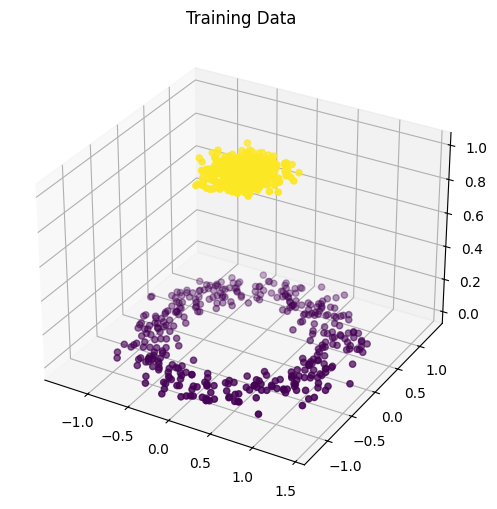

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c =y_train, cmap='viridis', marker='o')
ax.set_title("Training Data")
plt.show()

In [11]:
def plot_classification(projection, y_true, y_pred, name):

    fig, ax = plt.subplots(figsize=(5, 5))
    
    color = []
    for y_t, y_p in zip(y_true, y_pred):
        if y_t != y_p:
            if y_p == 0:
                color.append((1, 0.4, 0))
            else:
                color.append((0.85, 0, 0))
        elif y_t == y_p:
            if y_p == 0:
                color.append((0.4, 1, 0))
            else:
                color.append((0, 0.85, 0))
    ax.scatter(projection[:, 0], projection[:, 1], c=color)
    
    plt.title(name)
    plt.show()

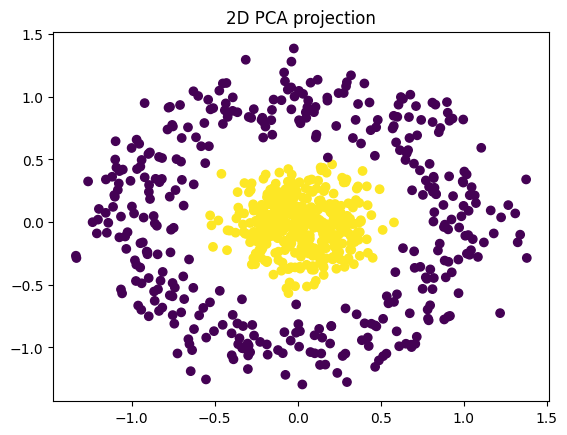

In [12]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
projection = pca_model.fit_transform(X_train, y_train)
plt.scatter(projection[:, 0], projection[:, 1], c=y_train, cmap="viridis",marker = "o")
plt.title("2D PCA projection")
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       125
           1       0.59      0.62      0.60       125

    accuracy                           0.59       250
   macro avg       0.59      0.59      0.59       250
weighted avg       0.59      0.59      0.59       250



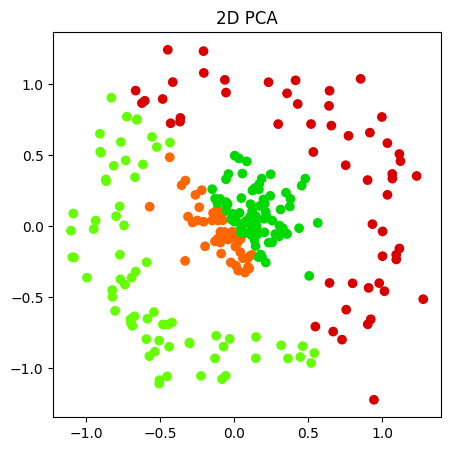

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
x_test = pca_model.fit_transform(X_test, y_test)
clf = LinearSVC(random_state=0, tol=1e-5, dual="auto")
clf.fit(x_test, y_test)
print(classification_report(y_test, clf.predict(x_test)))
plot_classification(x_test, y_test, clf.predict(x_test), "2D PCA")

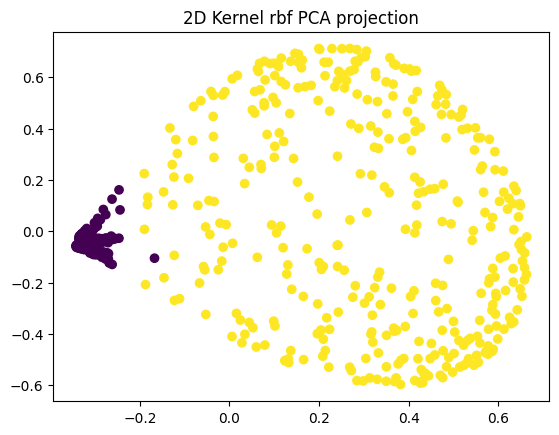

In [14]:
from sklearn.decomposition import KernelPCA

kernel_pca_model = KernelPCA(n_components=2, kernel="rbf", gamma=10)
projection = kernel_pca_model.fit_transform(X_train, y_train)
plt.scatter(projection[:, 0], projection[:, 1], c=y_train, cmap="viridis",marker = "o")
plt.title("2D Kernel rbf PCA projection")
plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       125
           1       1.00      0.95      0.98       125

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



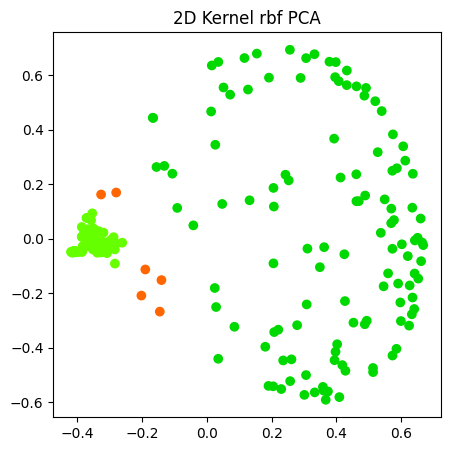

In [15]:
x_test = kernel_pca_model.fit_transform(X_test, y_test)
clf = LinearSVC(random_state=0, tol=1e-5, dual="auto")
clf.fit(x_test, y_test)
print(classification_report(y_test, clf.predict(x_test)))
plot_classification(x_test, y_test, clf.predict(x_test), "2D Kernel rbf PCA")

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

In [21]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 1000, n_classes=2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

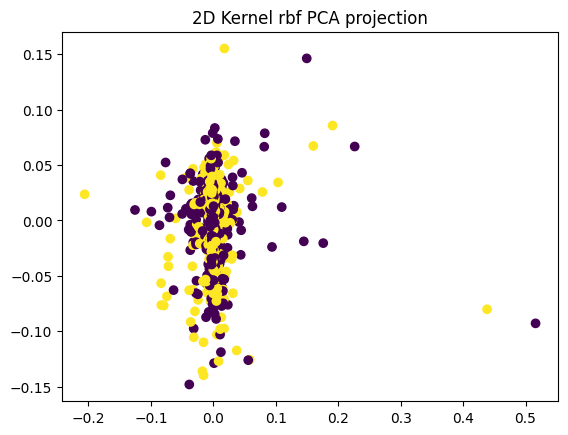

In [17]:
kernel_pca_model = KernelPCA(n_components=2, kernel="rbf", gamma=20)
projection = kernel_pca_model.fit_transform(X_train, y_train)
plt.scatter(projection[:, 0], projection[:, 1], c=y_train, cmap="viridis",marker = "o")
plt.title("2D Kernel rbf PCA projection")
plt.show()

              precision    recall  f1-score   support

           0       0.50      0.60      0.55       126
           1       0.49      0.39      0.43       124

    accuracy                           0.50       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.49      0.50      0.49       250



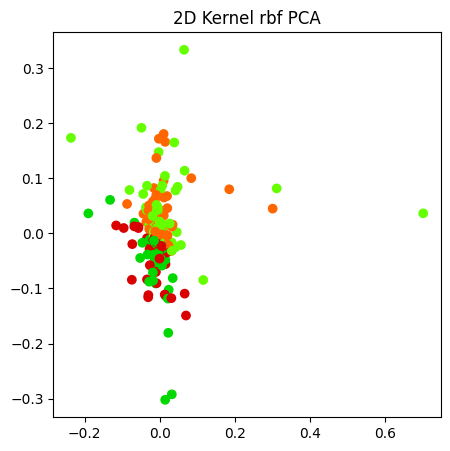

In [18]:
x_test = kernel_pca_model.fit_transform(X_test, y_test)
clf = LinearSVC(random_state=0, tol=1e-5, dual="auto")
clf.fit(x_test, y_test)
print(classification_report(y_test, clf.predict(x_test)))
plot_classification(x_test, y_test, clf.predict(x_test), "2D Kernel rbf PCA")

c:\Users\39346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\39346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\39346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\39346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\39346\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       126
           1       0.96      0.91      0.93       124

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



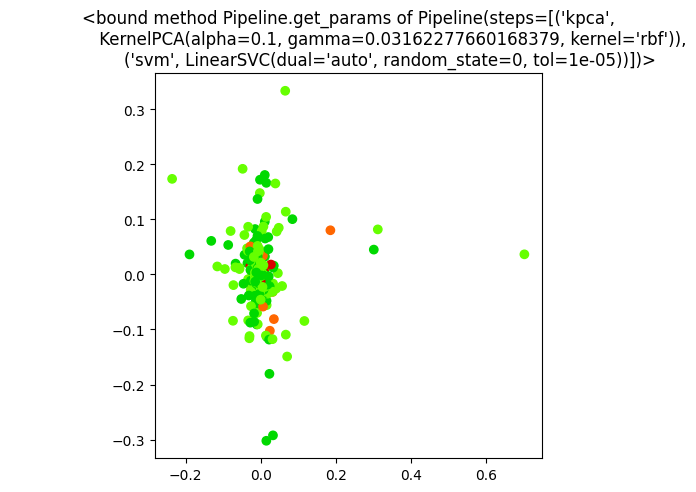

In [ ]:
from sklearn.pipeline import Pipeline
model = KernelPCA()
pipeline = Pipeline([
    ("kpca", KernelPCA(kernel="rbf")), 
    ("svm", LinearSVC(random_state=0, tol=1e-5, dual="auto"))
])
param_grid = {
    "kpca__kernel": ["linear", "poly", "rbf", "sigmoid", "cosine"],
    "kpca__gamma": np.logspace(-3, 3, 5), 
    "kpca__alpha" : [0.1, 1, 5, 10], 
    "svm__alpha" : [0.1, 1, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(classification_report(y_test, best_model.predict(X_test)))
plot_classification(x_test, y_test, best_model.predict(X_test), str(best_model.get_params))